In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


# Import the necessary libraries

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# **Load the dataset**

In [7]:
df = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')


In [8]:
#check the shape of the datasetn, we have 48895 rows and 16 columns
df.shape



(48895, 16)

In [9]:
#check the data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# **Data cleaning**

In [10]:
#check for duplicates. It looks like that we don't have any duplicates
df.duplicated().sum()

0

In [11]:
#look for missing values. We have missing values in the 'name', 'host_name', 'last_review '& 'reviews_per_month' columns.
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
#drop unnecessary columns. For example, for ethical resaons we have to drom the 'host_name'column.
df.drop(['name','host_name','last_review'], axis=1, inplace=True)

#view the remaining list of columns
df.columns


Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [13]:
#replace NaN values. In our case we are going to replace them with zeros.
df.fillna({'reviews_per_month':0}, inplace=True)

#check the results
df.reviews_per_month.isnull().sum()

0

In [14]:
#list of the unique neighbourhood_groups. In this data set we have 5 unique neighbourhood groups.

df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
#list of the unique room_types. We have 3 types of rooms. 
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
#number of different neighborhoods.We have 221 neighbourhood sub groups. 

len(df.neighbourhood.unique())

221

Now that our data is clean, let's get to what the data can tell us. 

# Analysis and visualisation

* We'll start with finding which hosts has the most number of bookings. 

In [17]:
#let's see the top 10 hosts has the most bookings in this dataset. Our top host had 327 bookings in 2019. 

top_host=df.host_id.value_counts().head(10)
top_host


219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [26]:
#create a new dataframe for tophosts
top_host_df =pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns = {'index': 'host_id', 'host_id':'bookings' }, inplace=True)
top_host_df


,host_id,bookings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


<Figure size 432x288 with 0 Axes>

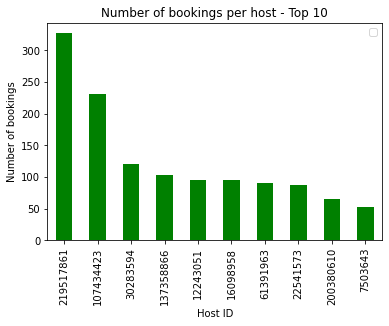

In [28]:
#plotting a barchart with Matplotlib
plt.figure()

top_host_df.plot.bar(x ='host_id', y='bookings', rot=0, color='green')
plt.xlabel('Host ID')
plt.ylabel('Number of bookings')
plt.title('Number of bookings per host - Top 10')
plt.xticks(rotation='vertical', size=10)

plt.legend('')


plt.show()



In [29]:
#bookings per room type : Entire homes/apt has the most number of bookings
room_types = df.room_type.value_counts()
room_types

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [35]:
#create a new DataFrame for the bookings by type of rooms
room_type_df = pd.DataFrame(room_types)

#rename columns
room_type_df.reset_index( inplace=True)
room_type_df.rename({'room_type':'bookings'}, axis=1, inplace=True)


room_type_df.rename(columns ={'index':'room_type'},inplace =True)
room_type_df


,room_type,bookings
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


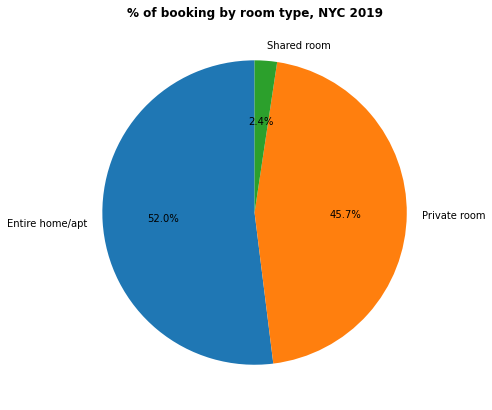

In [37]:
#plot a pie chart to show the distrubtion of the % of bookings by room type.

labels = room_type_df.room_type
numbers = room_type_df.bookings

pie1 = plt.figure(figsize=(10,7))
plt.pie(numbers, labels=labels,autopct='%1.1f%%', startangle=90)
plt.title('% of booking by room type, NYC 2019', weight='bold')

plt.show()


 * * 52% of people chose to book private homes or appartments

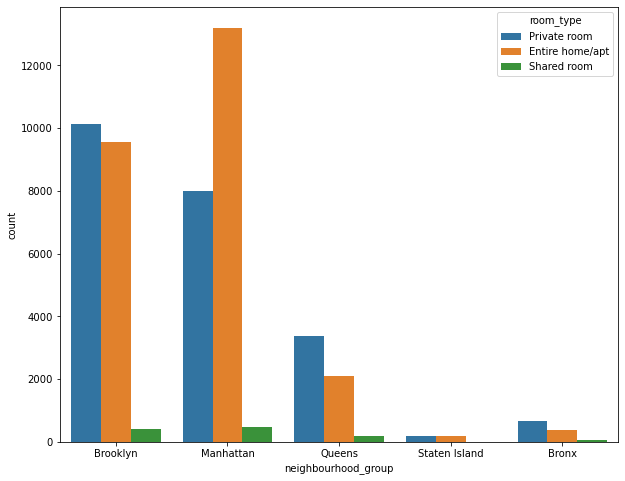

In [42]:
#a bar chart by Seaborn to show the bookings by type of rooms in the 5 neighbourhood groups
plt.figure(figsize=(10,8))
ax = sns.countplot(df['neighbourhood_group'],hue=df['room_type'])

In [43]:
#number of bookings by the neighbourhood groups. 
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

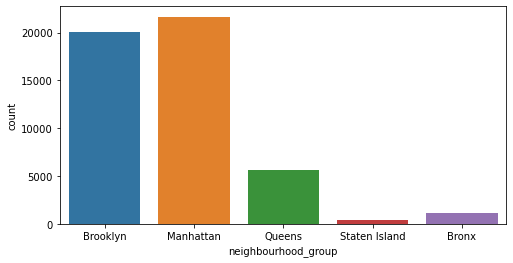

In [44]:
#bar graph to show the number of bookings by neighbourhood groups
plt.figure(figsize=(8,4))
ax = sns.countplot(df["neighbourhood_group"])

* Manhattan and Brooklyn together has 85% of the total bookings

In [45]:
#top 10 neighbourhoods sub groups
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<BarContainer object of 10 artists>

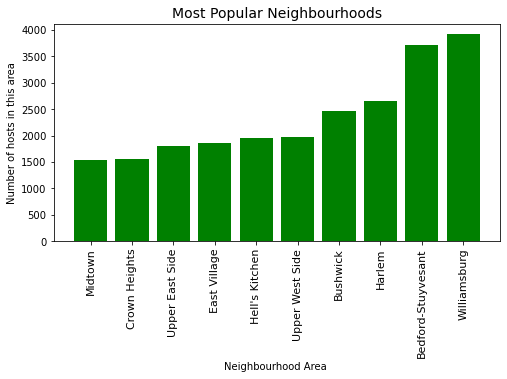

In [46]:
# bar graph using Matplotlib to the the top 10 neighbourhood sub groups

top_10 = df.neighbourhood.value_counts().head(10)
plt.figure(figsize=(8, 4))
x = list(top_10.index)
y = list(top_10.values)
x.reverse()
y.reverse()

plt.title('Most Popular Neighbourhoods', size=14)
plt.ylabel('Number of hosts in this area')
plt.xlabel('Neighbourhood Area ')
plt.xticks( rotation='vertical', size=11)

plt.bar(x, y , color='green')

In [47]:
#create a filter to further analyse the data from the top 5 neighbourhoods

#the top 5 neighbourhoods -Williamsburg,Bedford-Stuyvesant,Harlem, Bushwick & Upperwest Side- are situated either in Manhattan or Brooklyn. 

filt =df.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['neighbourhood_group'] == 'Brooklyn') &(df['neighbourhood_group'] == 'Queens')
             &(df['neighbourhood_group'] == 'Bronx')& (df['neighbourhood_group'] == 'Staten Island')
             
             |(df['neighbourhood'] == 'Williamsburg') | (df['neighbourhood'] == 'Bedford-Stuyvesant')|(df['neighbourhood'] == 'Harlem')|(df['neighbourhood'] == 'Bushwick')| (df['neighbourhood'] == 'Upper West Side')]       

filt.shape


(14728, 13)

In [48]:
#check whether we've applied the right filter
df.neighbourhood.value_counts().head(5).sum()

14728

In [50]:
#create a new dataframe for the top 5 neighbourhoods _ all of them in either Brooklyn or Manhattan

new_df = pd.DataFrame(filt)
new_df.drop(['calculated_host_listings_count', 'availability_365','id','latitude','longitude', 'reviews_per_month'], axis=1, inplace=True)


In [51]:
#comparison of the top 2 neighbourhood groups, Brooklyn and Manhattan

#get the number of bookings by neighbourhood group for the 2 top groups
count_man=new_df.loc[df['neighbourhood_group'] == 'Manhattan'].host_id.count()
count_brook=new_df.loc[df['neighbourhood_group'] != 'Manhattan'].host_id.count()

mean_pr_man=new_df.loc[df['neighbourhood_group'] == 'Manhattan'].price.mean()
mean_pr_brook=new_df.loc[df['neighbourhood_group'] != 'Manhattan'].price.mean()



test = [count_brook, mean_pr_brook, count_man,mean_pr_man]  
# number of bookings in Brooklyn is more than double than that of Manhattan
test

[10099, 116.11615011387266, 4629, 158.12335277597754]

In [52]:
#create a dew dataframe that shows the number of bookings and average price/night in the top 2 neighbourhood groups
d = {'name': ['Brooklyn', 'Manhattan'],'mean_price': [116.11, 158.12], 'bookings': [4629, 10099]}

test_df = pd.DataFrame(d)
test_df.set_index('name', inplace=True)
test_df

,mean_price,bookings
name,,
Brooklyn,116.11,4629
Manhattan,158.12,10099


<Figure size 720x360 with 0 Axes>

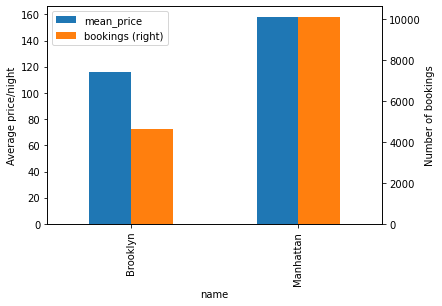

In [53]:
#a double bar chart to show the number of bookings and average price/night in Manhattan and Brooklyn 

fig = plt.figure(figsize=(10,5))
test_df.plot.bar( secondary_y= 'bookings', label = 'Name')

ax1, ax2 = plt.gcf().get_axes()
ax1.set_ylabel('Average price/night')
ax2.set_ylabel('Number of bookings')

plt.show()

* * Eventhough the average price per night is higher in Manhattan, the total number of bookings for the neighbourhoods in Manhattan is more than double than that of the neighbourhoods in Brookyln.
    

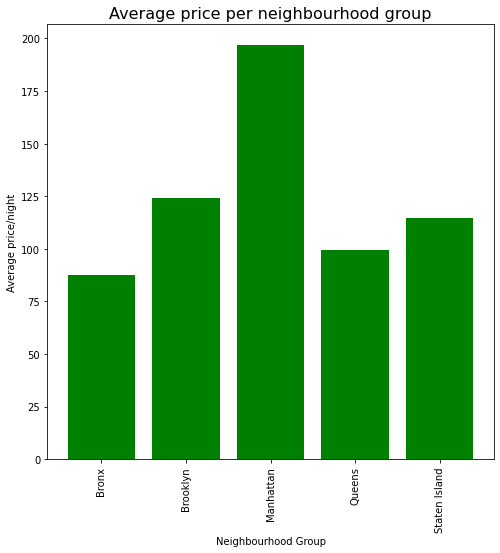

In [55]:
#lets compare the average prices in the 5 neighbourhood_groups

neighb_mean= df.groupby('neighbourhood_group').mean()

plt.figure(figsize =(8,8))

neighbourhood_group = [neighbourhood_group for neighbourhood_group, df in df.groupby('neighbourhood_group')]

plt.bar(neighbourhood_group, neighb_mean['price'], color='green')
plt.xticks(neighbourhood_group, rotation='vertical', size=10)
plt.xlabel('Neighbourhood Group')
plt.title('Average price per neighbourhood group' , size=16)
plt.ylabel('Average price/night')
plt.show()

* The average price per night is highest in Manhattan and lowest in Bronx. 

From our analysis we can conclude that the most popular neighbourhood based on the number of bookings on Airbnb in 2019 is Manhattan. This is despite it's higher average price per night. Not far behind in Brooklyn and these 2 groups make up almost half of the number of bookings in NYC in 2019. We can also conclude that the least popular amongst the Airbnb bookers were Staten Island & Bronx, despite it not having a big difference in the average price per night. This might be due to the fact that these 2 neighbourhoods seem to a bit further from most tourist attractions in NYC.



data source: kaggle